In [52]:
import matplotlib.pyplot as plt
import csv

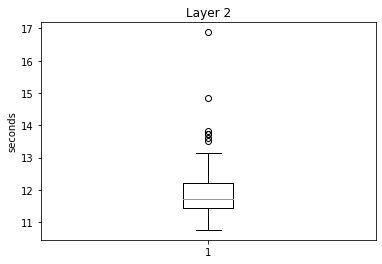

In [60]:
fpath = "../../../timing_stats/"
layer2 = []
with open(f'{fpath}SpatialTimingsLayer2.csv', 'r') as file:
    csv_reader = csv.reader(file, delimiter='\t')
    for row in csv_reader:
        layer2.append(row[0].split(":")[-1])

layer2_stats = [float(x) for x in layer2[1:]]
plt.boxplot(layer2_stats);
plt.ylabel("seconds");
plt.title("Layer 2");

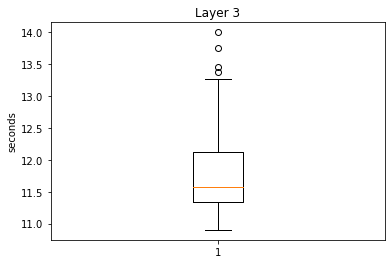

In [62]:
layer3 = []
with open(f'{fpath}SpatialTimingsLayer3.csv', 'r') as file:
    csv_reader = csv.reader(file, delimiter='\t')
    for row in csv_reader:
        layer3.append(row[0].split(":")[-1])

layer3_stats = [float(x) for x in layer3[1:]]
plt.boxplot(layer3_stats);
plt.ylabel("seconds");
plt.title("Layer 3");

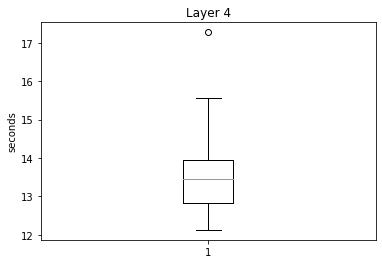

In [63]:
layer4 = []
with open(f'{fpath}SpatialTimingsLayer4.csv', 'r') as file:
    csv_reader = csv.reader(file, delimiter='\t')
    for row in csv_reader:
        layer4.append(row[0].split(":")[-1])

layer4_stats = [float(x) for x in layer4[1:]]
plt.boxplot(layer4_stats);
plt.ylabel("seconds");
plt.title("Layer 4");

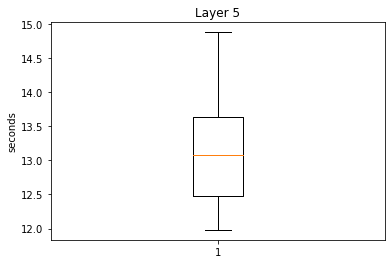

In [64]:
layer5 = []
with open(f'{fpath}SpatialTimingsLayer5.csv', 'r') as file:
    csv_reader = csv.reader(file, delimiter='\t')
    for row in csv_reader:
        layer5.append(row[0].split(":")[-1])

layer5_stats = [float(x) for x in layer5[1:]]
plt.boxplot(layer5_stats);
plt.ylabel("seconds");
plt.title("Layer 5");

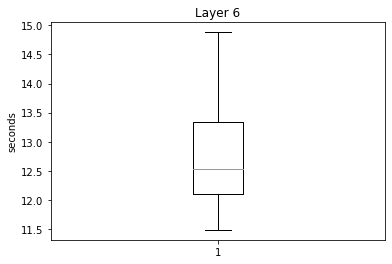

In [65]:
layer6 = []
with open(f'{fpath}SpatialTimingsLayer6.csv', 'r') as file:
    csv_reader = csv.reader(file, delimiter='\t')
    for row in csv_reader:
        layer6.append(row[0].split(":")[-1])

layer6_stats = [float(x) for x in layer6[1:]]
plt.boxplot(layer6_stats);
plt.ylabel("seconds");
plt.title("Layer 6");

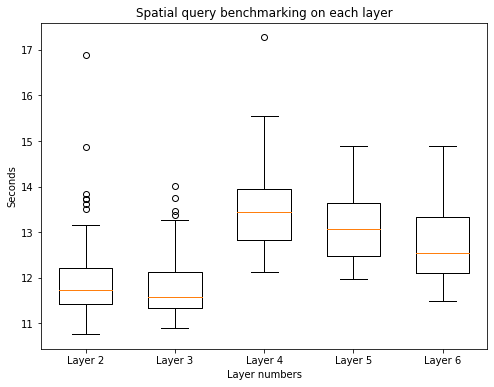

In [73]:
time_stats = [layer2_stats,
              layer3_stats,
              layer4_stats,
              layer5_stats,
              layer6_stats]

# create a figure object
fig = plt.figure(figsize=(8, 6))

# create a list of positions for each boxplot
positions = [1, 2, 3, 4, 5]

# create the boxplot
plt.boxplot(time_stats, positions=positions, widths=0.6)

# set the x-axis label and tick labels
plt.xlabel('Layer numbers')
plt.xticks(positions, ['Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6'])

# set the y-axis label
plt.ylabel('Seconds')

# set the title
plt.title('Spatial query benchmarking on each layer')
plt.savefig('spatial_query_benchmarking.pdf', format='pdf');
# show the figure
plt.show()